In [35]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from matplotlib import cm
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [36]:
zoo = pd.read_csv('zoo.csv', sep=',')
pd.set_option('display.max_columns', 500)
zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


# Removing Nulls

In [3]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

# Examining Stats

In [4]:
print(zoo['class_type'].unique())

[1 4 2 7 6 5 3]


1 is mammal

2 is bird

3 is reptile

4 is fish

5 is amphibian

6 is bug

7 is invertebrate

In [5]:
print(zoo['tail'].unique())

[0 1]


Wanted to see if there was an animal with 2 tails but I got nothing.

In [6]:
print(zoo.shape)

(101, 18)


In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Depending on the data set, normally some values would be very big and some are very small and because of that, scaling around the value 0 is neccesssary so that the variance of the values for each column are in the same range.

But in this case, we might not need to scale it.

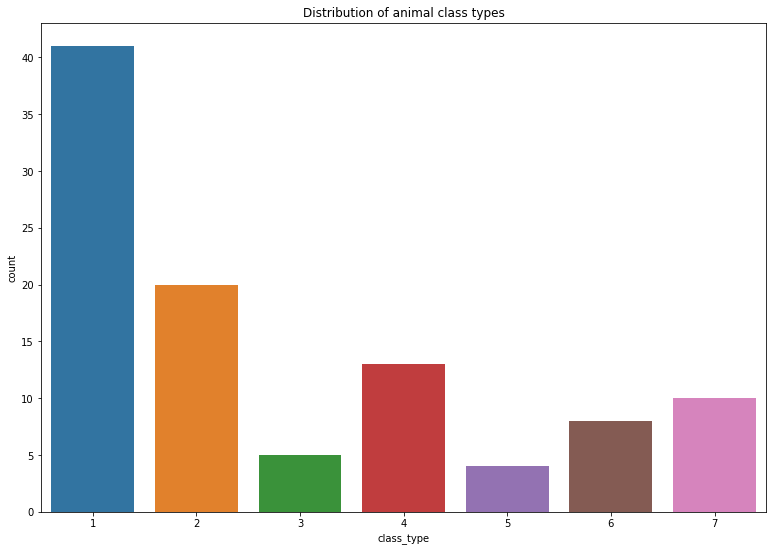

In [8]:
plt.figure(figsize=(13, 9))
sns.countplot(zoo['class_type'],label="Count")
plt.title("Distribution of animal class types")
plt.show()

It seems like there are a lot more mammals than other types of animal in this data set.

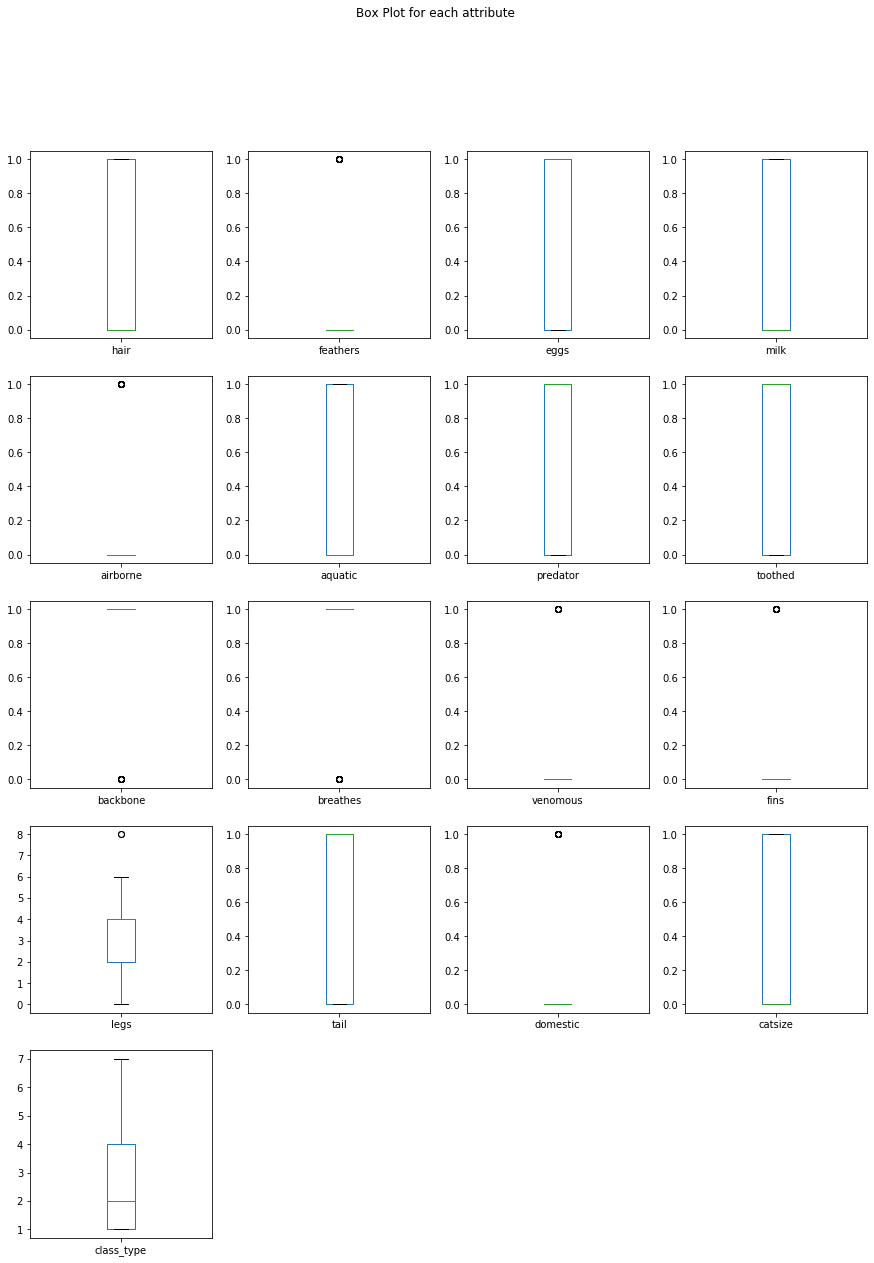

In [9]:
zoo.plot(kind='box', subplots=True, layout=(5, 4), sharex=False, sharey=False, figsize=(15,20), title='Box Plot for each attribute')
plt.savefig('zoo_boxplot')
plt.show()

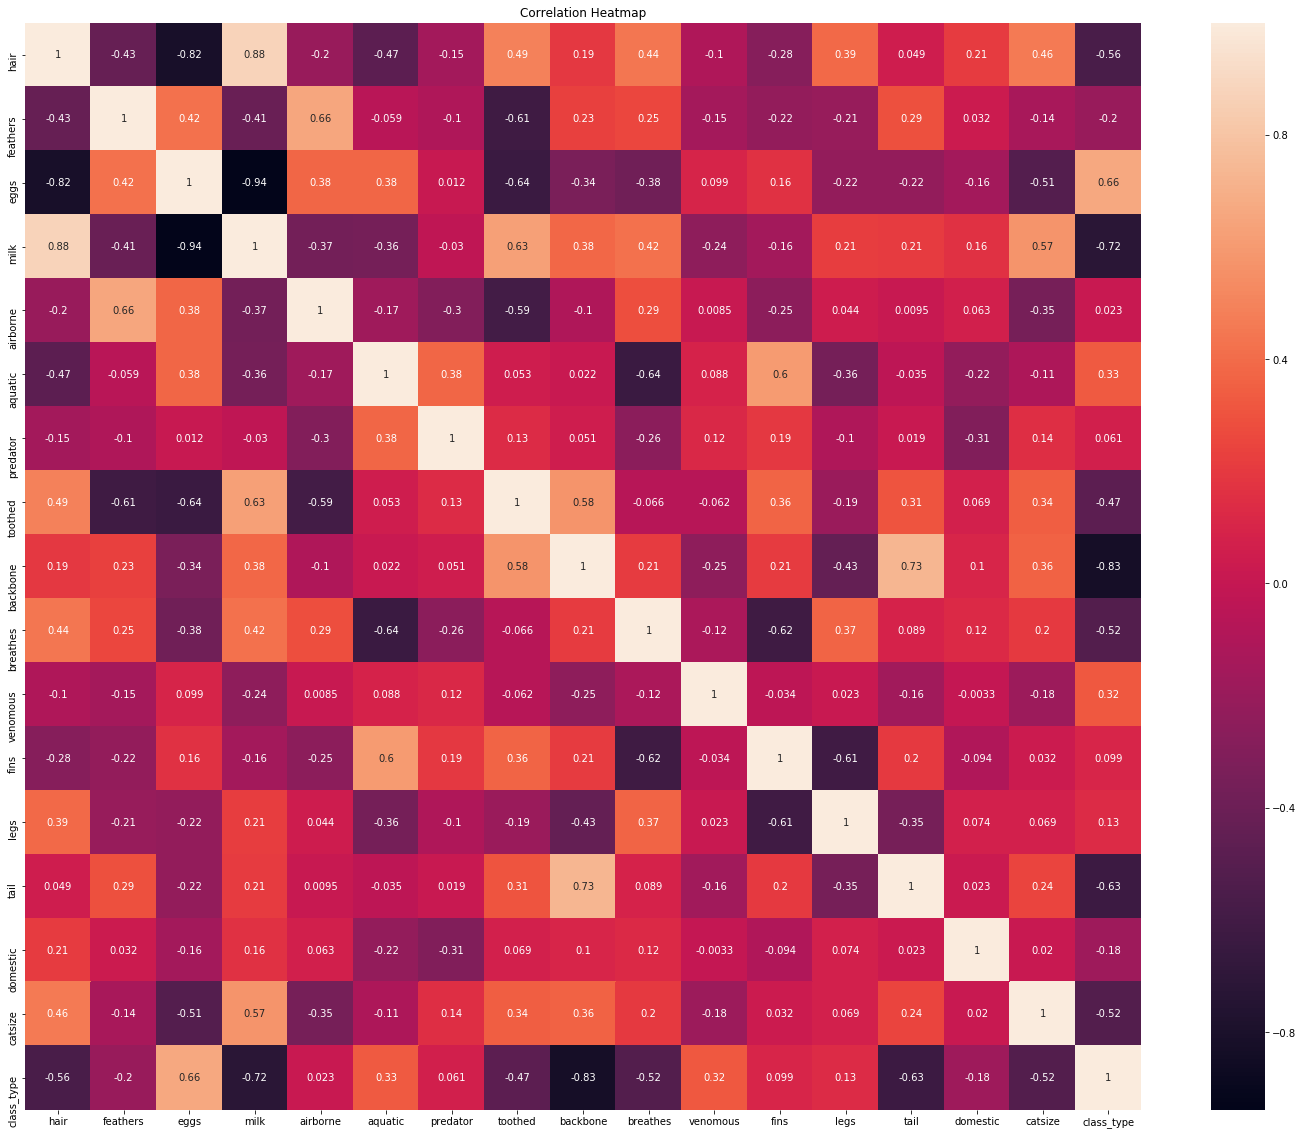

In [10]:
plt.subplots(figsize=(25,20))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = zoo.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Correlation heatmap to see which 2 attributes are closely correlated, this may be useful later on when choosing features to learn.

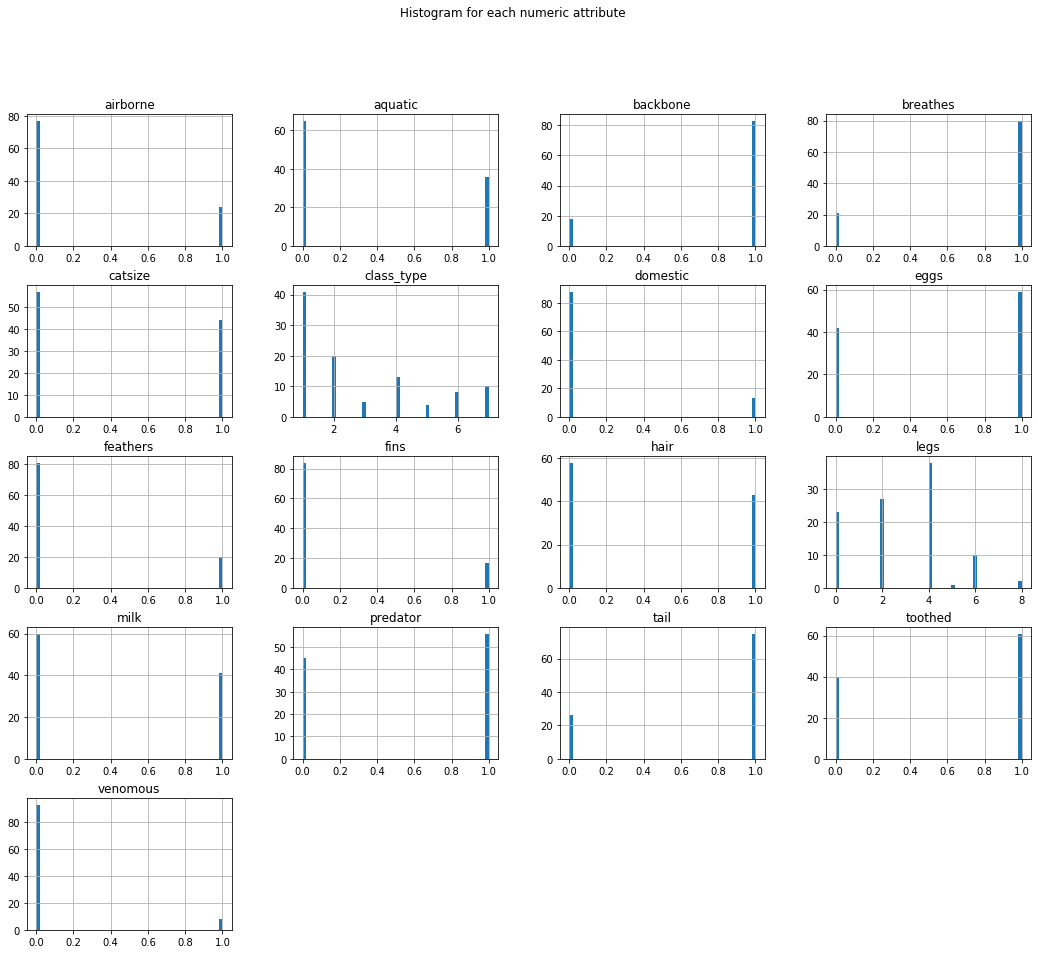

In [11]:
zoo.hist(bins=50, figsize=(18, 15))
plt.suptitle("Histogram for each numeric attribute")
plt.savefig('zoo_hist')
plt.show()

Some things that we can observe from the charts is that most animals are note venonmous. We can see that there is a pretty good distrubtion on the number of legs that animals have, it ranges from 0 to 8. Surprisingly there is only 1 animal with 5 legs.

In [12]:
zoo.loc[zoo['legs'] == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


In [37]:
zoo.loc[zoo['legs'] == 8]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7


And that animal is starfish, I completely forgot about it.

In [13]:
zoo = zoo.drop(columns=['animal_name'])
X = zoo.drop(columns=['class_type'])
# This is the attribute that we are trying to classify
y = zoo['class_type'] 

# Creating Training and Test Sets

In [14]:
# Splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Testing Models

### Logistic Regression

In [15]:
reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
score_lr = cross_val_score(reg, X, y, cv=5)
score_lr

array([1.        , 0.95238095, 0.9047619 , 0.94736842, 0.94444444])

In [16]:
print("Accuracy of Logicistic Multiclass Regression Model is %0.2f (+/- %0.2f)" % (score_lr.mean(), score_lr.std() * 2))

Accuracy of Logicistic Multiclass Regression Model is 0.95 (+/- 0.06)


### Decision Tree

In [17]:
tree = DecisionTreeClassifier(max_depth = 5)
score_dt = cross_val_score(tree, X, y, cv=5)
score_dt

array([0.95454545, 0.85714286, 0.85714286, 0.89473684, 0.94444444])

In [18]:
print("Accuracy of Decision Tree Model is %0.2f (+/- %0.2f)" % (score_dt.mean(), score_dt.std() * 2))

Accuracy of Decision Tree Model is 0.90 (+/- 0.08)


### Linear Discriminant Analysis

In [19]:
lda = LinearDiscriminantAnalysis()
score_lda = cross_val_score(lda, X, y, cv=5)
score_lda

array([1.        , 0.95238095, 0.95238095, 0.84210526, 0.88888889])

In [20]:
print("Accuracy of Linear Discriminant Model is %0.2f (+/- %0.2f)" % (score_lda.mean(), score_lda.std() * 2))

Accuracy of Linear Discriminant Model is 0.93 (+/- 0.11)


### Gaussian Naive Bayes

In [21]:
gnb = GaussianNB()
score_gnb = cross_val_score(gnb, X, y, cv=5)
score_gnb

array([1.        , 0.95238095, 0.9047619 , 0.94736842, 1.        ])

In [22]:
print("Accuracy of Gaussian Naive Model is %0.2f (+/- %0.2f)" % (score_gnb.mean(), score_gnb.std() * 2))

Accuracy of Gaussian Naive Model is 0.96 (+/- 0.07)


### K-Nearest Neighbors

In [23]:
knn = KNeighborsClassifier(weights='uniform')
score_knn = cross_val_score(knn, X, y, cv=5)
score_knn

array([0.90909091, 0.80952381, 0.85714286, 0.78947368, 0.88888889])

In [24]:
print("Accuracy of KNN Model is %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

Accuracy of KNN Model is 0.85 (+/- 0.09)


### Support Vector Machine

In [25]:
svm = SVC(kernel='linear', gamma='auto')
score_svm = cross_val_score(svm, X, y, cv=5)
score_svm

array([1.        , 0.95238095, 0.9047619 , 1.        , 0.94444444])

In [26]:
print("Accuracy of SVM Model is %0.2f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))

Accuracy of SVM Model is 0.96 (+/- 0.07)


# Result

In [27]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Linear Discriminant Analysis', 'Gaussian Naive Bayes', 'K-Nearest Neighbors' ,'Support Vector Machines'],
    'Score': [score_lr.mean(), score_dt.mean(), score_lda.mean(), score_gnb.mean(), score_knn.mean(), score_svm.mean()]})
results.sort_values(by='Score', ascending=False)

,Model,Score
3,Gaussian Naive Bayes,0.960902
5,Support Vector Machines,0.960317
0,Logistic Regression,0.949791
2,Linear Discriminant Analysis,0.927151
1,Decision Tree,0.901602
4,K-Nearest Neighbors,0.850824


Seems like Gaussian Naives and SVM are almost tied after a cross validation scoring. They both had accuracies of 96% plus or minus 7%.
I will predict some values using the GNB model and see what it is like.

In [28]:
# Let's make some predictions using our new model
gnb.fit(X_train, y_train)
predicted = gnb.predict(X)

In [29]:
# Showing the correct answer to see if it's correct
correct = y

In [30]:
labels = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']
for i, value in enumerate(correct):
    print("Predicted:\t", labels[predicted[i]-1])
    print("Correct Answer:\t", labels[value-1], "\n")
    if i == 10:
        break

Predicted:	 Mammal
Correct Answer:	 Mammal 

Predicted:	 Mammal
Correct Answer:	 Mammal 

Predicted:	 Fish
Correct Answer:	 Fish 

Predicted:	 Mammal
Correct Answer:	 Mammal 

Predicted:	 Mammal
Correct Answer:	 Mammal 

Predicted:	 Mammal
Correct Answer:	 Mammal 

Predicted:	 Mammal
Correct Answer:	 Mammal 

Predicted:	 Fish
Correct Answer:	 Fish 

Predicted:	 Fish
Correct Answer:	 Fish 

Predicted:	 Mammal
Correct Answer:	 Mammal 

Predicted:	 Mammal
Correct Answer:	 Mammal 



In [31]:
for i, value in enumerate(correct):
    if value != predicted[i]:
        print("Predicted:\t", labels[predicted[i]-1])
        print("Correct Answer:\t", labels[value-1], "\n")

Predicted:	 Invertebrate
Correct Answer:	 Reptile 

Predicted:	 Invertebrate
Correct Answer:	 Reptile 

Predicted:	 Mammal
Correct Answer:	 Reptile 

Predicted:	 Amphibian
Correct Answer:	 Reptile 



In [32]:
zoo['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

We can see that it predicted most of them right except class type 3, which is reptiles. It may be that the sample size for reptile is too small, therefore our models were not able to predict it correctly. There are 5 reptiles in total in this data set and we were able to predict 1/5 of them correctly.

# Confusion Matrix and Classification Report for LDA

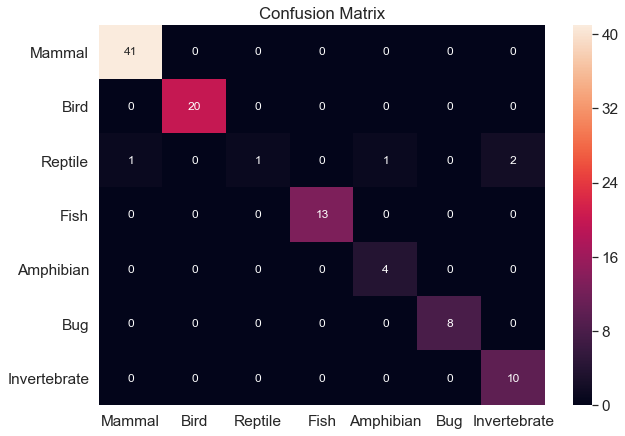

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        20
           3       1.00      0.20      0.33         5
           4       1.00      1.00      1.00        13
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         8
           7       0.83      1.00      0.91        10

    accuracy                           0.96       101
   macro avg       0.94      0.89      0.87       101
weighted avg       0.97      0.96      0.95       101



In [33]:
pred = gnb.predict(X)
cm = confusion_matrix(y, pred)

labels = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']
df_cm = pd.DataFrame(cm, labels, labels)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y, pred))